In [53]:
# import the library functions
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7.5]


In [54]:
data_amzn = pd.read_csv('/content/AMZN.csv')
data_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000
1,2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000
2,2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000
3,2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000
4,2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000


## Plot the graph of Amazon's Closing Share price data

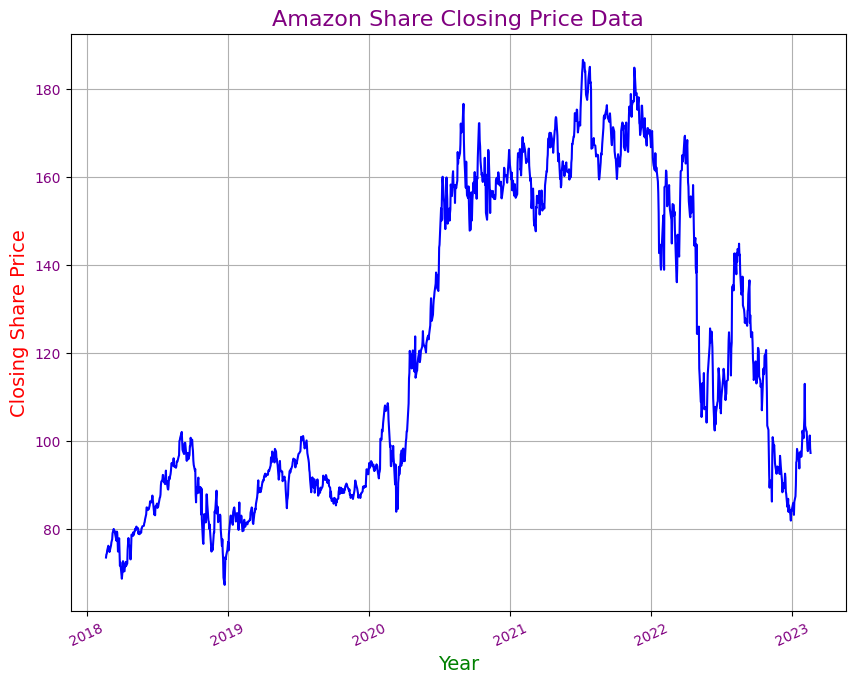

In [55]:
# Convert the date column to datetime format if necessary
data_amzn['Date'] = pd.to_datetime(data_amzn['Date'])

# Plot the data
plt.plot(data_amzn['Date'], data_amzn['Close'], color='blue')
plt.title('Amazon Share Closing Price Data', color='purple', fontsize=16)
plt.title('Amazon Share Closing Price Data', color='purple', fontsize=16)
plt.xlabel('Year', color='green', fontsize=14)
plt.ylabel('Closing Share Price', color='red', fontsize=14)
plt.xticks(rotation=25, color='purple')
plt.yticks(color='purple')
plt.grid(True)
plt.show()


## Time Series Analysis for Amazon

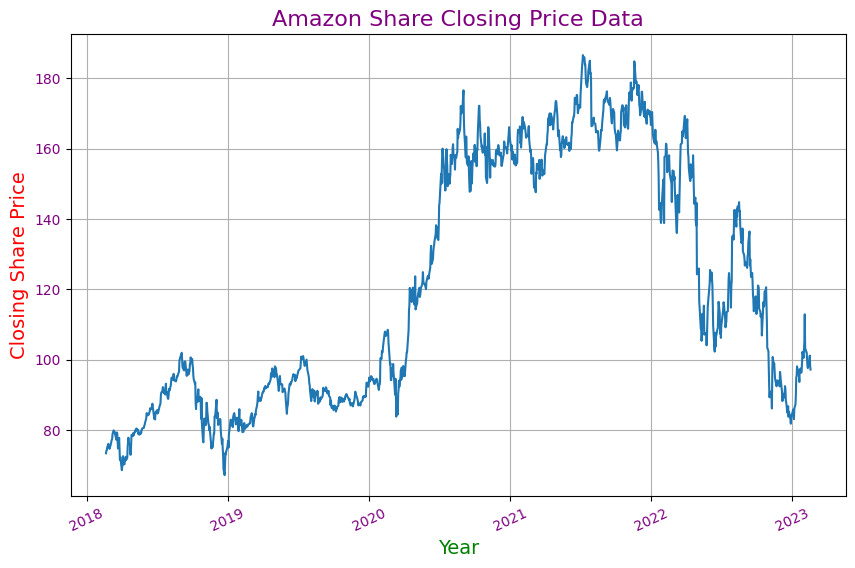

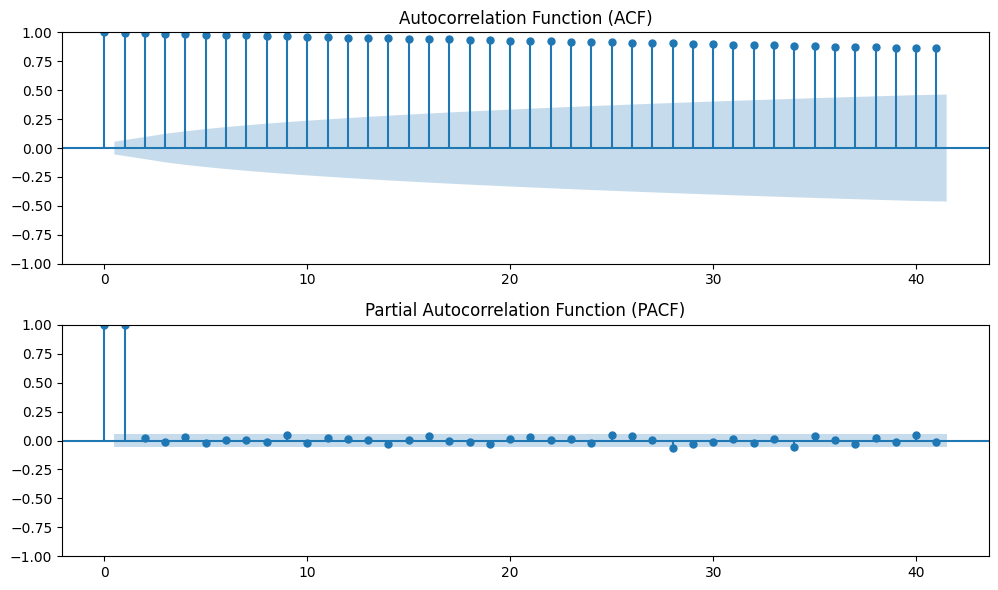


Augmented Dickey-Fuller Test for Entire Data:

Augmented Dickey-Fuller Test for AMZN Close Prices:
ADF Statistic: -1.6578089913331728
p-value: 0.45297105465166737
Critical Values:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275


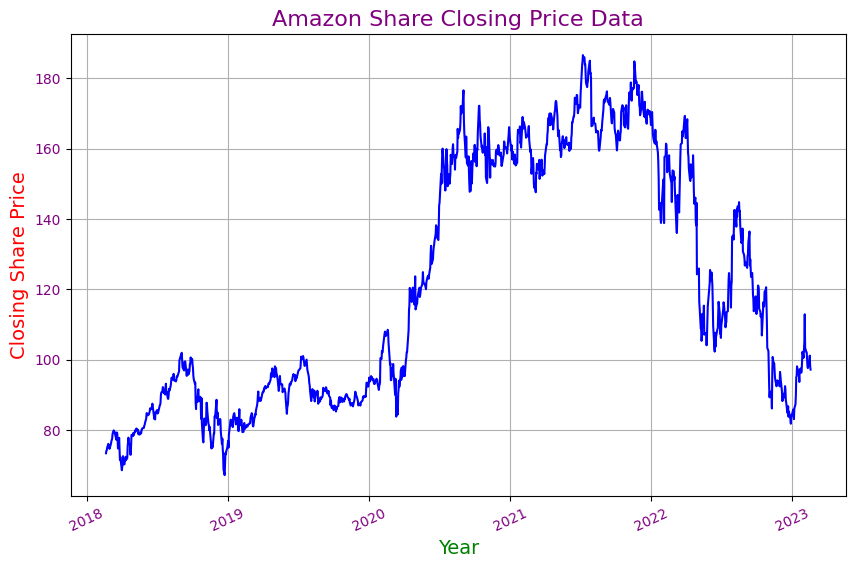

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Read in the data file
data_amzn = pd.read_csv('/content/AMZN.csv')

# Convert the 'Date' column to datetime format
data_amzn['Date'] = pd.to_datetime(data_amzn['Date'])

# Set the 'Date' column as the index
data_amzn.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data_amzn.index, data_amzn['Close'])
plt.title('Amazon Share Closing Price Data', color='purple', fontsize=16)
plt.xlabel('Year', color='green', fontsize=14)
plt.ylabel('Closing Share Price', color='red', fontsize=14)
plt.xticks(rotation=25, color='purple')
plt.yticks(color='purple')
plt.grid(True)
plt.show()


# Calculate and plot the ACF and PACF
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plot_acf(data_amzn['Close'], lags=41, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.subplot(2, 1, 2)
plot_pacf(data_amzn['Close'], lags=41, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

# Perform the Augmented Dickey-Fuller Test for stationarity
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Perform the Augmented Dickey-Fuller Test for stationarity on the entire data
print("\nAugmented Dickey-Fuller Test for Entire Data:")

# Perform the Augmented Dickey-Fuller Test for stationarity on the entire data
print("\nAugmented Dickey-Fuller Test for AMZN Close Prices:")
adf_test(data_amzn['Close'])

# Plot the entire data for AMZN Close Prices
plt.figure(figsize=(10, 6))
plt.plot(data_amzn.index, data_amzn['Close'], label='AMZN Close Prices', color='blue')
plt.title('Amazon Share Closing Price Data', color='purple', fontsize=16)
plt.xlabel('Year', color='green', fontsize=14)
plt.ylabel('Closing Share Price', color='red', fontsize=14)
plt.xticks(rotation=25, color='purple')
plt.yticks(color='purple')
plt.grid(True)
plt.show()



## Boxcox Transformation

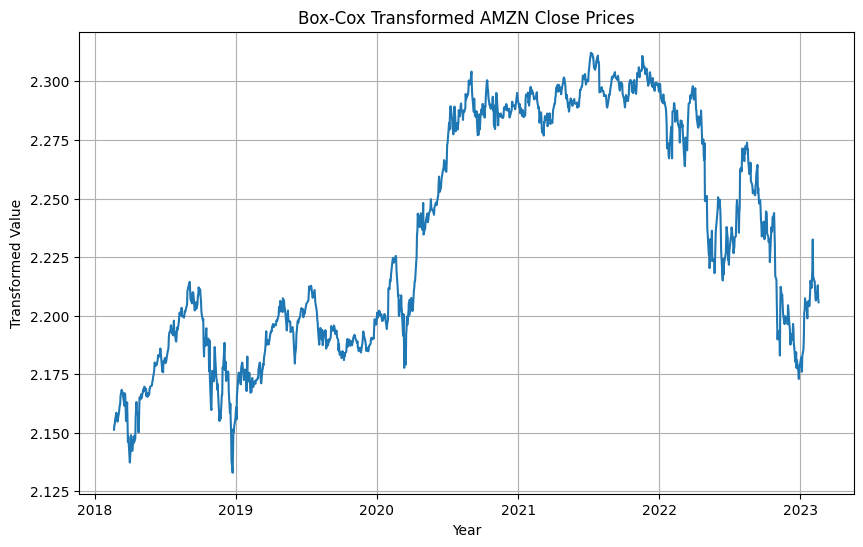

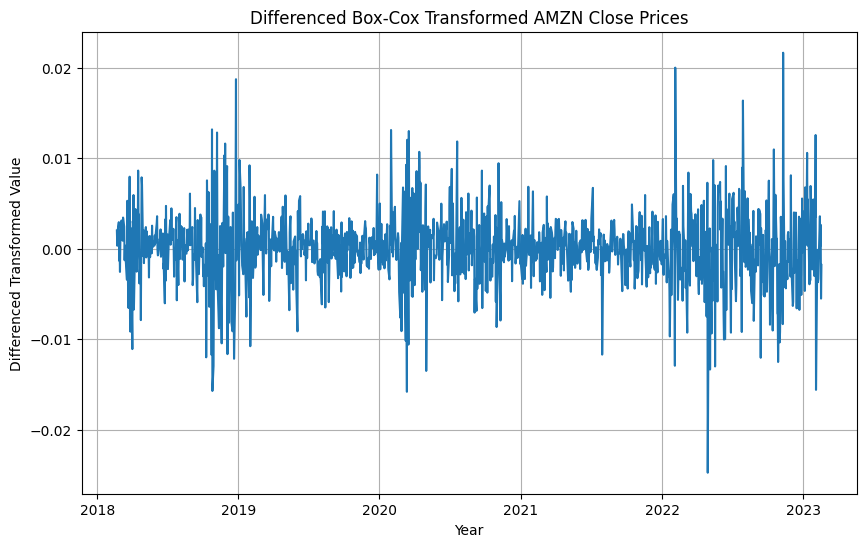

ADF Statistic: -13.829652342502527
p-value: 7.63428151147939e-26
Critical Values:
	1%: -3.435592223709696
	5%: -2.8638549702604803
	10%: -2.56800251776


In [58]:
from scipy.stats import boxcox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Read in the data file
data_amzn = pd.read_csv('/content/AMZN.csv')

# Convert the date column to datetime format
data_amzn['Date'] = pd.to_datetime(data_amzn['Date'])

# Set the date column as the index
data_amzn.set_index('Date', inplace=True)

# Apply Box-Cox transformation to the entire dataset
data_amzn['boxcox_data'], lambda_val = boxcox(data_amzn['Close'])

# Plot the Box-Cox transformed data
plt.figure(figsize=(10, 6))
plt.plot(data_amzn.index, data_amzn['boxcox_data'])
plt.title('Box-Cox Transformed AMZN Close Prices')
plt.xlabel('Year')
plt.ylabel('Transformed Value')
plt.grid(True)
plt.show()

# Apply differencing to the entire dataset
data_amzn['diff_boxcox_data'] = data_amzn['boxcox_data'].diff()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_amzn.index, data_amzn['diff_boxcox_data'])
plt.title('Differenced Box-Cox Transformed AMZN Close Prices')
plt.xlabel('Year')
plt.ylabel('Differenced Transformed Value')
plt.grid(True)
plt.show()

# Perform ADF test on the differenced data
adf_test(data_amzn['diff_boxcox_data'].dropna())


# Create An ARMA Model for Amazon's Closing Share price

## Loop wise



In [59]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Read in the data file
data_amzn = pd.read_csv('/content/AMZN.csv')

# Convert the date column to datetime format
data_amzn['Date'] = pd.to_datetime(data_amzn['Date'])

# Set the date column as the index
data_amzn.set_index('Date', inplace=True)

# Define function to identify the best ARIMA model orders
def find_best_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_model = None
    best_params = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p, d, q))
                    results = model.fit()
                    aic = results.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_model = results
                        best_params = (p, d, q)
                except (ValueError, np.linalg.LinAlgError) as e:
                    print(f"ARIMA({p},{d},{q}) fitting failed: {e}")
                    continue

    print("Best ARIMA model found:")
    print("AIC:", best_aic)
    print("Parameters:", best_params)
    print("Model Summary:")
    print(best_model.summary())

    return best_model, best_params

# Define the range of p, d, q values
p_values = range(3)
d_values = range(2)  # Assuming d=1 or 0
q_values = range(3)

# Find the best ARIMA model orders
best_model, best_params = find_best_arima(data_amzn['Close'], p_values, d_values, q_values)

# Fit the ARIMA model using the best order
model_fit = ARIMA(data_amzn['Close'], order=best_params).fit()


Best ARIMA model found:
AIC: 6122.315475889585
Parameters: (2, 1, 2)
Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.158
Date:                Tue, 30 Apr 2024   AIC                           6122.315
Time:                        22:19:39   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.813      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.728    

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.158
Date:                Tue, 30 Apr 2024   AIC                           6122.315
Time:                        22:19:44   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.813      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.728      0.000      -0.989      -0.931
ma.L1          1.6972      0.011    152.237      0.0

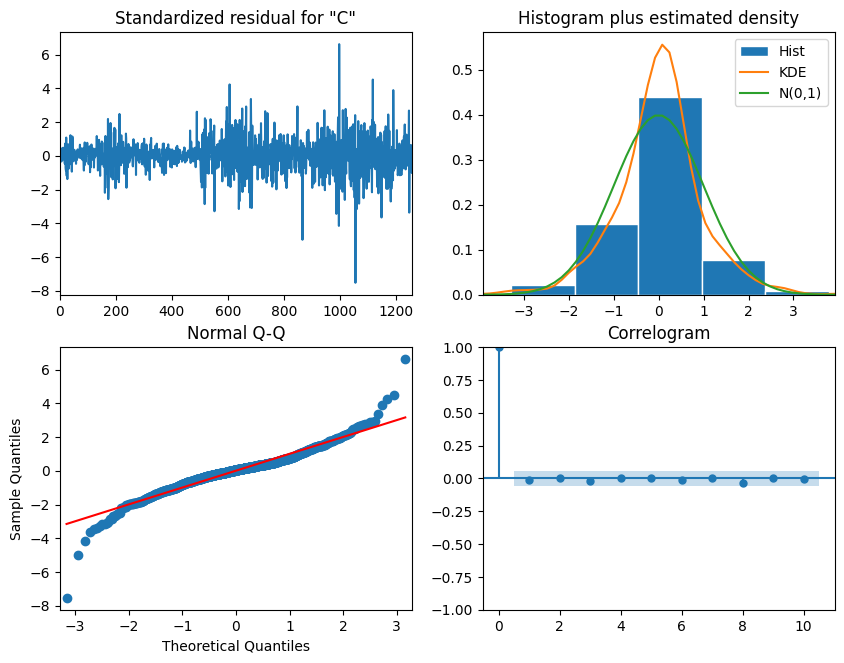

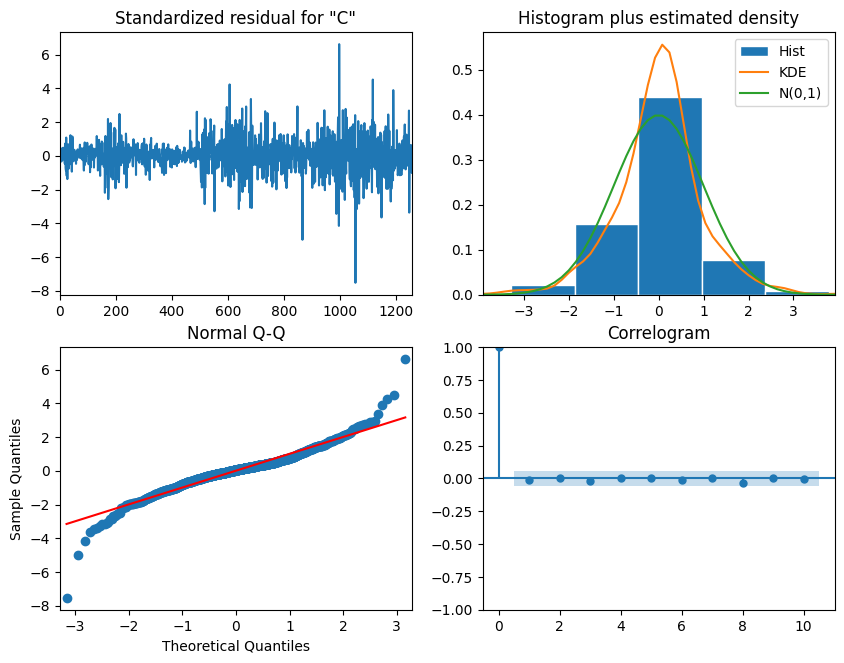

In [60]:
model_amzn = ARIMA(data_amzn['Close'], order=(2,1,2))

model_fit = model_amzn.fit()
print(model_fit.summary())
model_fit.plot_diagnostics()

## Forecasting for 24 months

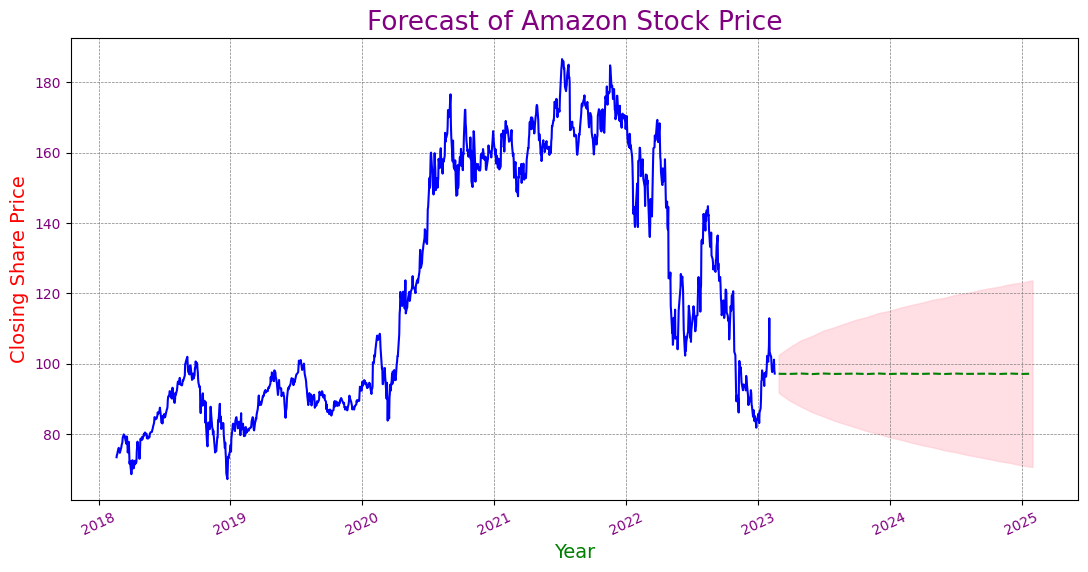

In [61]:
# Get the index of the last data point
last_index = data_amzn.index[-1]
n_forecast = 24
# Produce a forecast for the next 24 months using get_forecast() method of the fitted model
forecast = model_fit.get_forecast(steps=n_forecast)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a new index for the forecast period
forecast_index = pd.date_range(start=last_index, periods=n_forecast, freq='M')

# Plot the original data
plt.figure(figsize=(13, 6))
plt.plot(data_amzn['Close'], label='Original Data', color='blue')

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, 'g--', label='Forecast')

# Plot the confidence intervals
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.title('Forecast of Amazon Stock Price', color='purple', fontsize=19)
plt.xlabel('Year', color='green', fontsize=14)
plt.ylabel('Closing Share Price', color='red', fontsize=14)
plt.xticks(rotation=25, color='purple')
plt.yticks(color='purple')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

## Fourier transforms

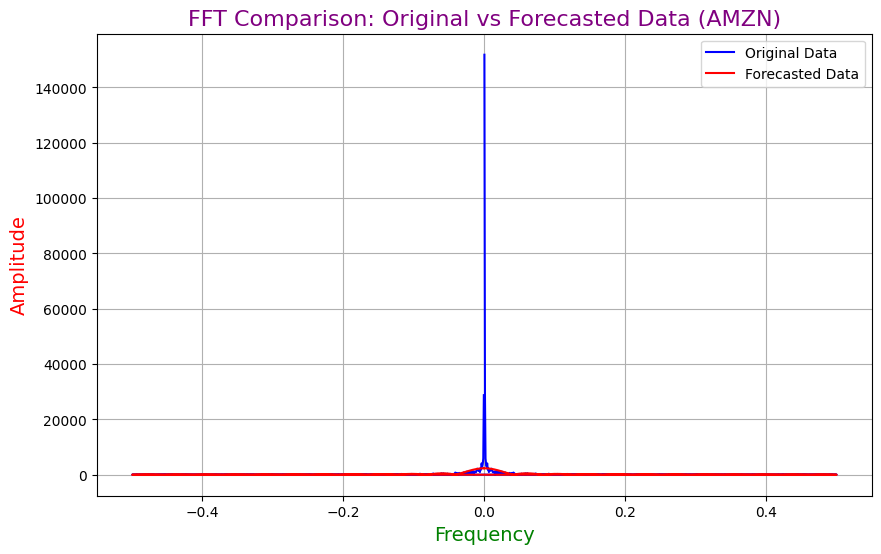

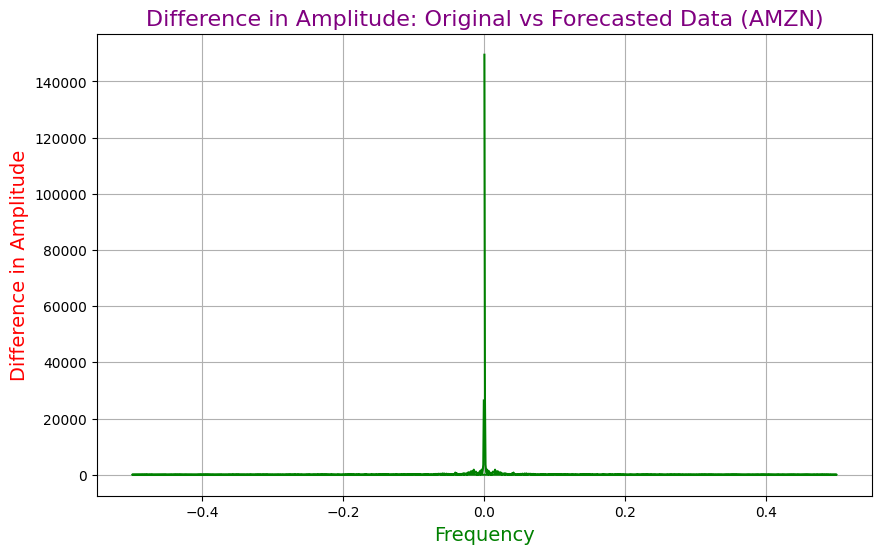

In [62]:
# Compute FFT or DFT for the original data_amzn
fft_original_amzn = np.fft.fft(data_amzn['Close'], n=len(data_amzn))
freq_original_amzn = np.fft.fftfreq(len(data_amzn), d=1)  # Frequency components

# Compute FFT or DFT for the forecasted data_amzn
fft_forecast_amzn = np.fft.fft(forecast_values.ravel(), n=len(data_amzn))
freq_forecast_amzn = np.fft.fftfreq(len(data_amzn), d=1)  # Frequency components

# Find the difference in amplitude
amplitude_diff_amzn = np.abs(np.abs(fft_original_amzn) - np.abs(fft_forecast_amzn))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(freq_original_amzn, np.abs(fft_original_amzn), label='Original Data', color='blue')
plt.plot(freq_forecast_amzn, np.abs(fft_forecast_amzn), label='Forecasted Data', color='red')
plt.title('FFT Comparison: Original vs Forecasted Data (AMZN)', color='purple', fontsize=16)
plt.xlabel('Frequency', color='green', fontsize=14)
plt.ylabel('Amplitude', color='red', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Plot the difference in amplitude
plt.figure(figsize=(10, 6))
plt.plot(freq_original_amzn, amplitude_diff_amzn, color='green')
plt.title('Difference in Amplitude: Original vs Forecasted Data (AMZN)', color='purple', fontsize=16)
plt.xlabel('Frequency', color='green', fontsize=14)
plt.ylabel('Difference in Amplitude', color='red', fontsize=14)
plt.grid(True)
plt.show()


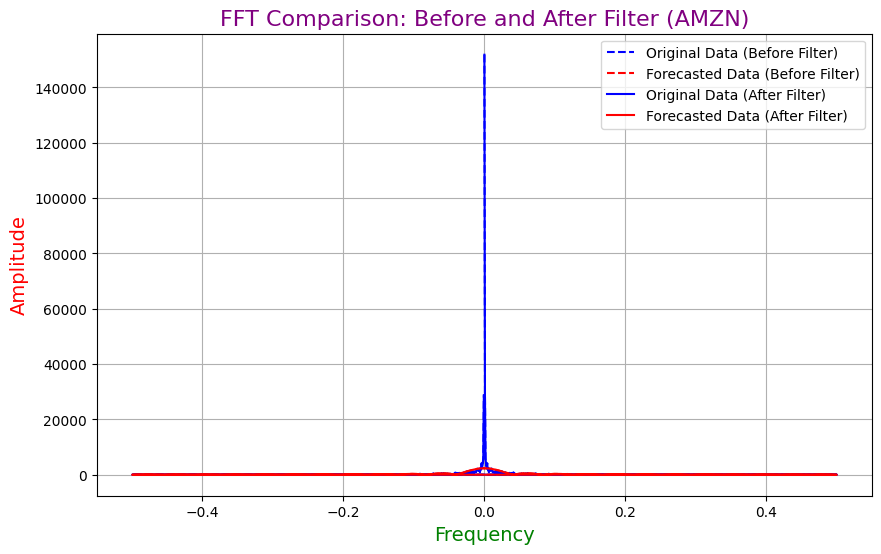

In [63]:
from scipy.signal import butter, filtfilt

# Define a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply a low-pass filter to the original data_amzn
cutoff_frequency = 0.1  # Adjust cutoff frequency as needed
b, a = butter_lowpass(cutoff_frequency, fs=1)  # Assuming unit sample rate
filtered_data_amzn = filtfilt(b, a, data_amzn['Close'])

# Compute FFT or DFT for the filtered original data_amzn
fft_filtered_original_amzn = np.fft.fft(filtered_data_amzn, n=len(data_amzn))
freq_filtered_original_amzn = np.fft.fftfreq(len(data_amzn), d=1)  # Frequency components

# Apply a low-pass filter to the forecasted data_amzn
filtered_future_forecast = filtfilt(b, a, forecast_values.ravel())

# Compute FFT or DFT for the filtered forecasted data_amzn
fft_filtered_forecast_amzn = np.fft.fft(filtered_future_forecast, n=len(data_amzn))
freq_filtered_forecast_amzn = np.fft.fftfreq(len(data_amzn), d=1)  # Frequency components

# Plot the original and forecasted data_amzn before and after filtering
plt.figure(figsize=(10, 6))
plt.plot(freq_original_amzn, np.abs(fft_original_amzn), label='Original Data (Before Filter)', linestyle='--', color='blue')
plt.plot(freq_forecast_amzn, np.abs(fft_forecast_amzn), label='Forecasted Data (Before Filter)', linestyle='--', color='red')
plt.plot(freq_filtered_original_amzn, np.abs(fft_filtered_original_amzn), label='Original Data (After Filter)', color='blue')
plt.plot(freq_filtered_forecast_amzn, np.abs(fft_filtered_forecast_amzn), label='Forecasted Data (After Filter)', color='red')
plt.title('FFT Comparison: Before and After Filter (AMZN)', color='purple', fontsize=16)
plt.xlabel('Frequency', color='green', fontsize=14)
plt.ylabel('Amplitude', color='red', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


## Create a LSTM Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

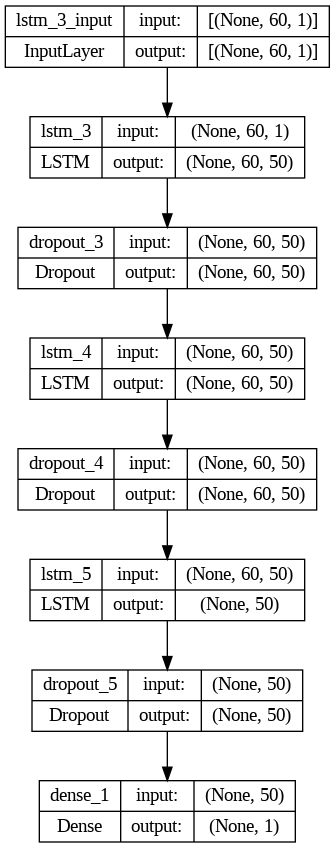

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import plot_model

# Load the data
data_amzn = pd.read_csv('/content/AMZN.csv', parse_dates=['Date'], index_col='Date')

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_amzn['Close'].values.reshape(-1,1))

# Defining the length of the input sequence (e.g., 60 days)
sequence_length = 60

# Splitting the dataset into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size - sequence_length:,:]

# Creating a function to generate sequence data
def create_dataset(dataset, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(dataset)):
        X.append(dataset[i - sequence_length:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, sequence_length)
X_test, y_test = create_dataset(test, sequence_length)

# Reshaping input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Model Architecture
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Print model architecture summary
print(model.summary())

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot model architecture
plot_model(model, to_file='lstm_model_architecture.png', show_shapes=True, show_layer_names=True)


8/8 [==============================] - 0s 42ms/step
Train RMSE: 4.173813146740443
Test RMSE: 8.097457778120651
RMSE for the entire dataset: 5.247880662678248
1/1 [==============================] - 0s 28ms/step


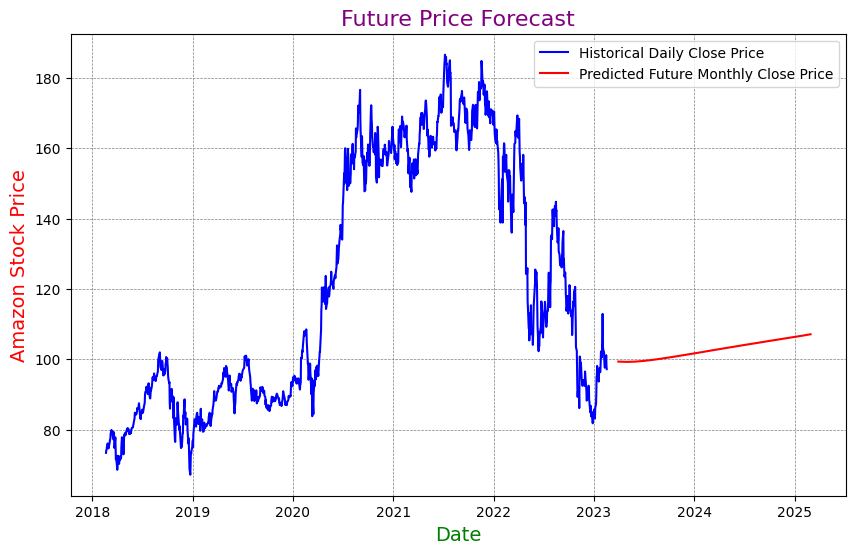

In [66]:
# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transforming the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform([y_train])
y_test_inv = scaler.inverse_transform([y_test])


# Calculating RMSE for training and testing datasets
train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Concatenate the predictions made for the training and testing sets
all_predictions = np.concatenate((train_predict, test_predict), axis=0)
all_targets = np.concatenate((y_train_inv[0], y_test_inv[0]), axis=0)

# Calculate RMSE for the entire dataset
all_rmse = np.sqrt(mean_squared_error(all_targets, all_predictions))
print(f'RMSE for the entire dataset: {all_rmse}')

# Forecasting 24 months into the future
future_steps = 24
last_sequence = scaled_data[-sequence_length:]
current_batch = last_sequence.reshape((1, sequence_length, 1))

future_forecast = []
for i in range(future_steps):
    current_pred = model.predict(current_batch)[0]
    future_forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

future_forecast = scaler.inverse_transform(future_forecast)

# Plotting Future Forecast
future_dates = pd.date_range(start=data_amzn.index[-1], periods=future_steps+1, freq='M')[1:]
plt.figure(figsize=(10, 6))
plt.plot(data_amzn.index, data_amzn['Close'], label='Historical Daily Close Price', color='blue')
plt.plot(future_dates, future_forecast, label='Predicted Future Monthly Close Price', color='red')
plt.title('Future Price Forecast', color='purple', fontsize=16)
plt.xlabel('Date', color='green', fontsize=14)
plt.ylabel('Amazon Stock Price', color='red', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.legend()
plt.show()
